# Basit Doğrusal Regresyon

* Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* Amacımız TV reklam harcamaları ile Satış arasındaki ilişkiyi modellemektir.
* Aradaki ilişkiyi görsel olarak değerlendirmeye çalışalım.

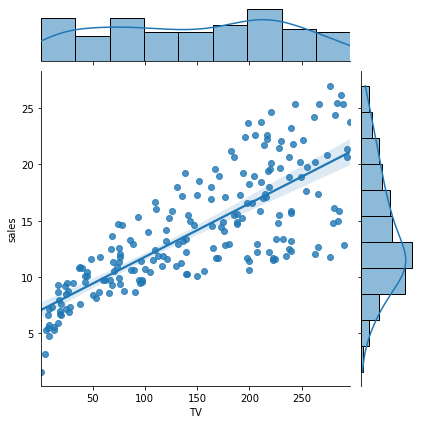

In [4]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [5]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [6]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [7]:
model = LinearRegression().fit(X,y)

* Model nesnesi içerisinden **sabit** ve **katsayıyı** alıyoruz.

In [8]:
model.intercept_

array([7.03259355])

In [9]:
model.coef_

array([[0.04753664]])

* ### R²

In [10]:
model.score(X,y)

0.611875050850071

## Tahmin

* Modeli daha iyi anlayabilmek adına görselleştiriyoruz.
* **ci:** Etraflarına güven aralığı koyup koymamaktır.
* **scatter_kws:** Renklendirme ayalarlamalarıdır.

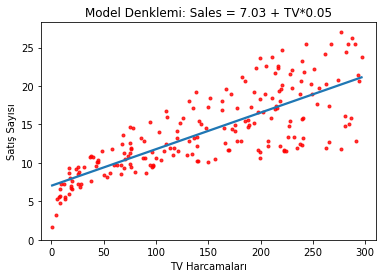

In [11]:
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {"color" : "r", "s" : 9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_xlabel("TV Harcamaları")
g.set_ylabel("Satış Sayısı")
plt.ylim(bottom = 0)
plt.xlim(-10,310)
plt.show()

* Modeli kullanarak tahminde bulunuyoruz.
* Bağımsız değişken değerini istiyor.
* 165 diyoruz (Rastgele)
* Yani TV değerini girmiş olduk.

In [12]:
model.predict([[165]])

array([[14.87613922]])

* Birden fazla değişken giriyoruz.

In [13]:
test = [[5],[15],[30]]
model.predict(test)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar

* **MSE:** Hata Kareler Ortalaması
* **RMSE:** Hata Kareler Ortalamasının Karekökü

* Gerçek **X** değerlerini koyarak tahminleri elde edelim.

In [14]:
model.predict(X)[0:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

* Gerçek ve tahmin değerlerini karşılaştırmak için birleştirip bakıyoruz.

In [15]:
y_pred = pd.DataFrame(model.predict(X), columns = ["y_pred"])
residuals = pd.concat([y, y_pred], axis = 1)
residuals.head(5)

,sales,y_pred
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


In [16]:
residuals["residual"] = residuals["sales"] - residuals["y_pred"]
residuals.head()

,sales,y_pred,residual
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218


* **MSE** (Hata Kareler Ortalaması)

In [17]:
residuals["MSE"] = residuals["residual"]**2
residuals.head()

,sales,y_pred,residual,MSE
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719


In [18]:
residuals["MSE"].mean()

10.512652915656753